In [1]:
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 13.8 MB/s 
     |████████████████████████████████| 30.5 MB 91.5 MB/s 
     |████████████████████████████████| 219 kB 87.3 MB/s 
     |████████████████████████████████| 7.7 MB 44.5 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=845040b2479492137b9b4c119ac584ed8a0eb29aaece296cd16dff02ad5b85ed
  Stored in directory: /root/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [3]:
#create nodes
G = nx.DiGraph()
nodes = open("Nodes.txt", 'r').read().split('\n')
lat = open("Latitude.txt", 'r').read().split('\n')
lon = open("Longitude.txt", 'r').read().split('\n')
airports = np.column_stack((nodes, lat, lon))

airports = airports[0:len(airports)-1,:]
clean_airports = []

for i in airports:
  if float(i[2]) <= 180 and float(i[2]) >= -180 and float(i[1]) <= 90 and float(i[1]) >= -90:
    clean_airports.append(i)
    G.add_node(i[0], pos = (i[1], i[2]))
clean_airports = np.asarray(clean_airports)

In [4]:
len(list(G.nodes))

5998

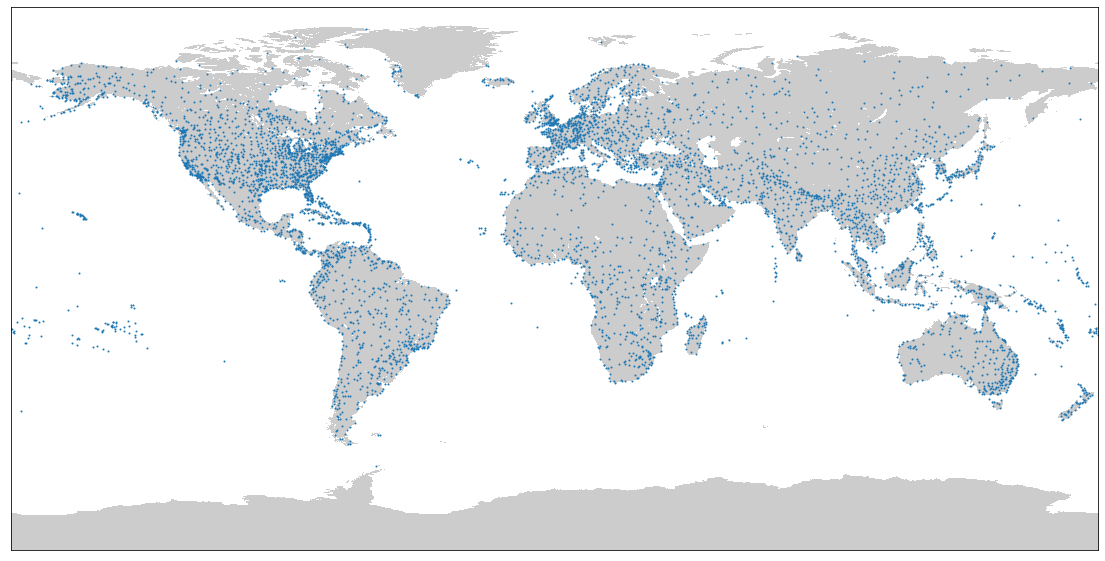

In [5]:
fig = plt.figure()
fig.set_size_inches(20, 10)
pos=nx.get_node_attributes(G,'pos')
for k, v in pos.items():
  pos[k] = (float(v[1]), float(v[0]))
nx.draw_networkx_nodes(G, pos, node_size = 1, label = False)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.xticks(range(-180,181, 30))
plt.yticks(range(-90,91, 15))

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawlsmask()

In [6]:
sou = open("Source.txt", 'r').read().split('\n')
des = open("Destination.txt", 'r').read().split('\n')
routes = np.column_stack((sou, des))
print(len(routes))

67663


In [7]:
delete_list_sou = list(set(routes[:,0]) - set(clean_airports[:,0]))

In [8]:
delete_list_des = list(set(routes[:,1]) - set(clean_airports[:,0]))

In [9]:
print(delete_list_sou)

['TQA', 'KUZ', 'ORZ', 'RCE', 'NTG', 'SHC', 'KCL', 'GSE', 'DHB', 'AOQ', 'WBB', 'LMC', 'KBU', 'MPP', 'PAF', 'KTW', 'TQI', 'FSZ', 'VCE', 'PPN', 'IAO', 'NIQ', 'LIR', 'QUO', 'SZE', 'KOZ', 'QJH', 'CTG', 'OTD', 'ZEL', 'ACU', 'IOQ', 'KTB', 'PEC', 'DLI', 'LGQ', 'LKE', 'KKI', 'DGA', 'XEQ', 'ZIG', 'PVE', 'DIJ', 'RIG', 'BCD', 'WWT', 'SSB', 'GHE', 'WSX', 'ATT', 'TVS', 'NUP', 'FLR', 'KCC', 'MCM', 'JIJ', 'WTL', 'OLH', 'CIA', 'LSA', 'BLQ', 'UPK', 'SVR', 'TZA', 'WNH', 'MLH', 'RDV', 'YKT', 'KHQ', 'CXF', 'UGB', 'EDA', 'GCW', 'PEG', 'RCH', 'QUV', 'PQS', 'BAQ', 'SZI', 'MRA', 'TGC', 'TSF', 'KPB', 'IGM', 'OHH', 'EAR', 'QUW', 'NSQ', 'HKB', 'SGG', 'FVM', 'KXU', 'EXI', 'BZO', 'KCQ', 'TLT', 'IUI', 'SVC', 'PHO', 'ZDY', 'FBS', 'CKX', 'LNV', 'BKO', 'CKD', 'GRV', 'SYB', 'JJA', 'TCT', 'TCR', 'SQS', 'CZH', 'HYL', 'MPH', 'SXP', 'THD', 'PYC', 'CUK', 'BFQ', 'KGX', 'IOT', 'GSM', 'BCV', 'BXU', 'MYQ', 'BLD', 'IKE', 'LCR', 'INB', 'JUK', 'TNO', 'DIW', 'MUC', 'AOS', 'QOQ', 'TFI', 'KLL', 'QUB', 'INC', 'JUU', 'PSA', 'PNL', 'ADZ'

In [10]:
print(delete_list_des)

['TQA', 'MTE', 'KUZ', 'ORZ', 'RCE', 'NTG', 'SHC', 'KCL', 'GSE', 'DHB', 'AOQ', 'WBB', 'LMC', 'KBU', 'MPP', 'PAF', 'KTW', 'TQI', 'FSZ', 'VCE', 'PPN', 'IAO', 'NIQ', 'LIR', 'QUO', 'SZE', 'KOZ', 'QJH', 'CTG', 'OTD', 'ZEL', 'ACU', 'IOQ', 'KTB', 'PEC', 'DLI', 'LGQ', 'LKE', 'KKI', 'DGA', 'XEQ', 'ZIG', 'PVE', 'DIJ', 'RIG', 'BCD', 'WWT', 'SSB', 'QFX', 'GHE', 'WSX', 'ATT', 'TVS', 'NUP', 'FLR', 'KCC', 'MCM', 'JIJ', 'WTL', 'OLH', 'CIA', 'LSA', 'BLQ', 'UPK', 'TZA', 'SVR', 'WNH', 'MLH', 'RDV', 'YKT', 'KHQ', 'CXF', 'UGB', 'EDA', 'BSS', 'GCW', 'PEG', 'RCH', 'QUV', 'PQS', 'BAQ', 'SZI', 'MRA', 'TGC', 'TSF', 'KPB', 'IGM', 'OHH', 'EAR', 'QUW', 'NSQ', 'HKB', 'SGG', 'FVM', 'KZB', 'KXU', 'EXI', 'BZO', 'KCQ', 'TLT', 'IUI', 'SVC', 'PHO', 'ZDY', 'FBS', 'CKX', 'LNV', 'BKO', 'CKD', 'GRV', 'SYB', 'JJA', 'TCT', 'TCR', 'SQS', 'CZH', 'KPR', 'HYL', 'MPH', 'SXP', 'THD', 'PYC', 'CUK', 'BFQ', 'KGX', 'IOT', 'GSM', 'BCV', 'BXU', 'MYQ', 'BLD', 'IKE', 'LCR', 'INB', 'JUK', 'TNO', 'DIW', 'MUC', 'AOS', 'QOQ', 'TFI', 'KLL', 'QUB'

In [11]:
delete_list = []
for i in range(len(routes)):
  if routes[i][0] in delete_list_sou or routes[i][1] in delete_list_des:
    delete_list.append(i)
print(len(delete_list))

3933


In [12]:
routes = np.delete(routes, delete_list, 0)
print(len(routes))

63730


In [13]:
for i in routes:
  G.add_edge(i[0], i[1])

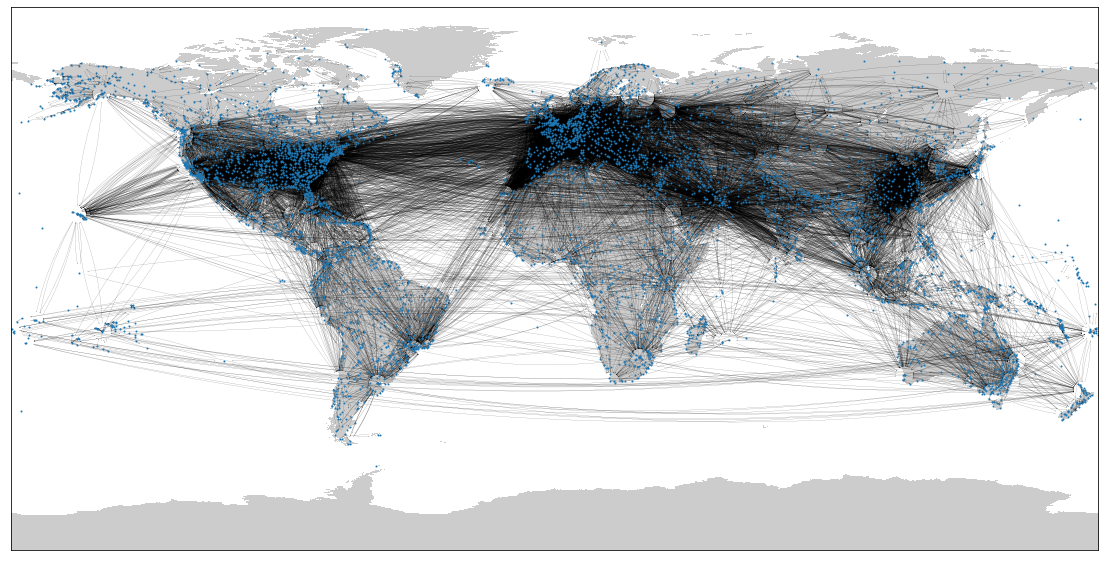

In [148]:
fig = plt.figure()
fig.set_size_inches(20, 10)
pos=nx.get_node_attributes(G,'pos')

for k, v in pos.items():
    pos[k] = (float(v[1]), float(v[0]))
    
nx.draw_networkx_nodes(G, pos, node_size = 1, label = False)
nx.draw_networkx_edges(G, pos,width = 0.1, arrowsize = 1 ,connectionstyle="arc3,rad=0.1")
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.xticks(range(-180,181, 30))
plt.yticks(range(-90,91, 15))

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawlsmask()


In [14]:
# create edge attribute weight with default None 
nx.set_edge_attributes(G, values=None, name = 'weight')

#count the occurance of the airport in the routes database
sources, sources_counts=np.unique(routes[:,0], return_counts=True)
des, des_counts=np.unique(routes[:,1], return_counts=True)

# create edge attribute source_occurrence with default None
nx.set_node_attributes(G, values=0, name = 'so')
for node in list(sources):
    G.nodes[node]['so'] = list(sources_counts)[list(sources).index(node)]

# create edge attribute destination_occurrence with default None
nx.set_node_attributes(G, values=0, name = 'do')
for node in list(des):
    G.nodes[node]['do'] = list(des_counts)[list(des).index(node)]
  
def add_weight_to_edges(graph):
    for node in graph.nodes:
        neighbors = [n for n in G.neighbors(node)]
        for nb in neighbors:
            graph[node][nb]['weight'] = np.mean([graph.nodes[node]['so'],G.nodes[node]['do'],graph.nodes[nb]['so'],graph.nodes[nb]['do']])

add_weight_to_edges(G)

In [52]:
# create node attribute degree
nx.set_node_attributes(G, values = 0, name = 'degree')
for i in G.nodes():
  G.nodes[i]['degree'] = G.degree[i]

In [60]:
# remove airports with 0 degree
delete_list = []
for i in G.nodes():
  if G.nodes[i]['degree'] == 0:
    delete_list.append(i)
for i in delete_list:
  G.remove_node(i)
print(len(delete_list))
print(len(G.nodes()))

0
3211


In [61]:
# SIR model

import math
import random

# Set edge attribute weight fraction (weight of an edge/average number of degrees in the neighborhood of the source node)
nx.set_edge_attributes(G, values=None, name = 'weight fraction')
nx.set_edge_attributes(G, values=None, name = 'weight total')

weight_total = []
for i in G.nodes():
  weight_neighbors = []
  for j in G.neighbors(i):
    weight_neighbors.append(G[i][j]['weight'])
  G.nodes[i]['weight total'] = sum(weight_neighbors)

for i in G.nodes():
  for j in G.edges(i):
    if G.nodes[i]['weight total'] != 0:
      G.edges[j]['weight fraction'] = G.edges[j]['weight']/G.nodes[i]['weight total']

# Infection and Recovery and time coefficients
beta = 1
gamma = 0.02
time = 1
ni = (1-gamma/beta)*(math.exp(beta - gamma)**time/(1+math.exp(beta - gamma)**time)) # infected portion

# Infect the random airport

nx.set_node_attributes(G, values = 0, name = 'infected population')
rnd  = random.choice(list(G.nodes()))
G.nodes[rnd]['infected population'] = ni*G.nodes[rnd]['degree']
print(rnd,G.nodes[rnd]['infected population'])

KTS 4.275396312085841


In [63]:
# Infected 'population' at each neigbouring airport

def infect(G, cycles):
  for i in range(cycles):
    for node in G.nodes():
      neighbors = [n for n in G.neighbors(node)]
      for nb in neighbors:
        # Check that airport is infected
        if G.nodes[node]['infected population'] != 0 and\
        np.random.rand(1)[0] <= (G.nodes[node]['infected population']/G.nodes[node]['degree'])*G.edges[node,nb]['weight fraction']: # Roll the dice
          G.nodes[nb]['infected population'] = ni*G.nodes[nb]['degree']

In [69]:
infect(G, 100)

In [70]:
infected_list = []
for i in G.nodes():
  if G.nodes[i]['infected population'] != 0:
    infected_list.append(i)
print(infected_list)

['MAG', 'HGU', 'LAE', 'POM', 'WWK', 'KEF', 'YAM', 'YAY', 'YBC', 'YBG', 'YBK', 'YBL', 'YCB', 'YCD', 'YCL', 'YCO', 'YCY', 'YZS', 'YDF', 'YDQ', 'YEG', 'YEK', 'YEV', 'YFB', 'YFC', 'YFO', 'YFS', 'YGK', 'YGL', 'YGP', 'YGR', 'YHD', 'YHI', 'YHK', 'YHM', 'YHU', 'YHY', 'YHZ', 'YIO', 'YJT', 'YKA', 'YKF', 'YKL', 'YLW', 'YMM', 'YMO', 'YNA', 'YOJ', 'YOW', 'YPL', 'YPN', 'YPY', 'YQB', 'YQF', 'YQG', 'YQK', 'YQM', 'YQQ', 'YQR', 'YQT', 'YQX', 'YQY', 'YQZ', 'YRB', 'YRT', 'YSB', 'YSJ', 'YSM', 'YSY', 'YTE', 'YTH', 'YTS', 'YTZ', 'YUB', 'YUL', 'YUT', 'YUX', 'YUY', 'YVM', 'YVO', 'YVP', 'YVQ', 'YVR', 'YWG', 'YWK', 'YWL', 'YXC', 'YXE', 'YXH', 'YXJ', 'YXL', 'YXP', 'YXS', 'YXT', 'YXU', 'YXY', 'YYB', 'YYC', 'YYE', 'YYG', 'YYH', 'YYJ', 'YYQ', 'YYR', 'YYT', 'YYU', 'YYY', 'YYZ', 'YZF', 'YZP', 'YZV', 'ZFM', 'ALG', 'TMR', 'AAE', 'CZL', 'HRM', 'TLM', 'ORN', 'AZR', 'BSK', 'ELG', 'GHA', 'HME', 'INZ', 'TGR', 'OGX', 'IAM', 'COO', 'BOY', 'ACC', 'ABJ', 'ABV', 'BNI', 'ENU', 'IBA', 'KAN', 'LOS', 'PHC', 'NIM', 'MIR', 'TUN', 'GAE'

In [72]:
nx.set_node_attributes(G, values = 'b', name = 'color')
for i in G.nodes():
  if G.nodes[i]['infected population'] != 0:
    G.nodes[i]['color'] = 'r'

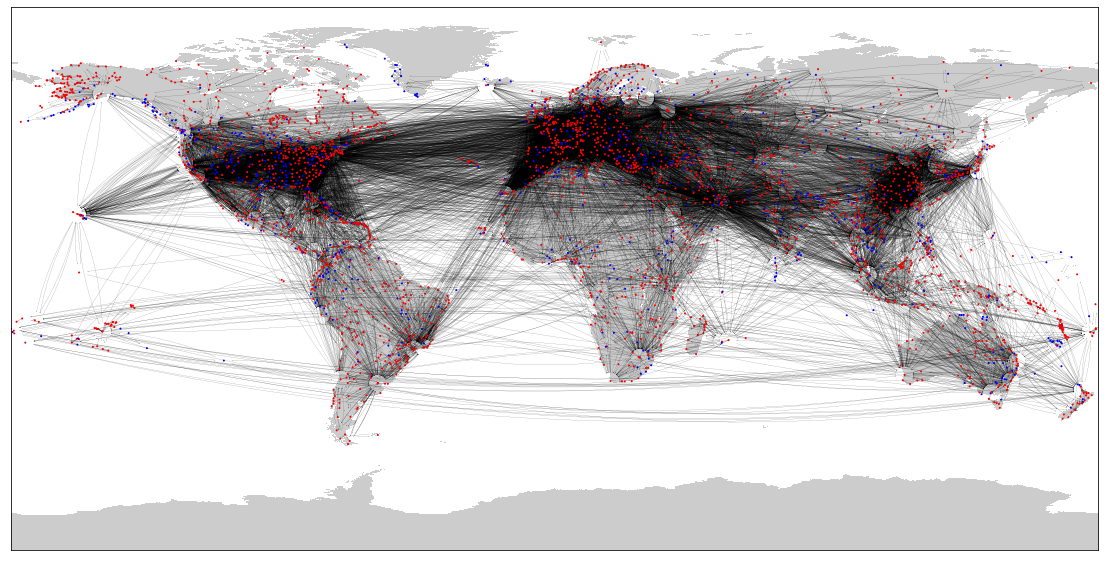

In [73]:
fig = plt.figure()
fig.set_size_inches(20, 10)
pos=nx.get_node_attributes(G,'pos')
color=nx.get_node_attributes(G,'color')

for k, v in pos.items():
    pos[k] = (float(v[1]), float(v[0]))
    
nx.draw_networkx_nodes(G, pos, node_color = color.values(), node_size = 1, label = False)
nx.draw_networkx_edges(G, pos,width = 0.1, arrowsize = 1 ,connectionstyle="arc3,rad=0.1")
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.xticks(range(-180,181, 30))
plt.yticks(range(-90,91, 15))

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawlsmask()
